# 3.4 영화 리뷰: 이진 분류 예제

리뷰 텍스트를 기반으로 영화 리뷰를 긍정(positive)과 부정(negative)으로 분류하는 방법

## 코드 3-1 IMDB 데이터셋 로드하기
인터넷 영화 데이터로부터 가져온 양극단의 리뷰 5만개로 이루어진 IMDB 데이터셋을 사용.
2만 5000개의 훈련 데이터와 2만5000개의 테스트 데이터로 나누어져 있다.
50%는 부정 50%는 긍정 리뷰로 구성

In [9]:
from keras.datasets import imdb
import numpy as np

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

np.load = np_load_old

## 코드 3-2  정수 시퀀스를 이진 행렬로 인코딩하기
one-hot encoding으로 0과 1의 벡터로 변환

In [22]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    #크기가 (len(sequences),dimension)이고 모든 원소가 0인 행렬
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


## 코드 3-3 모델 정의하기

In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


## 코드 3-4 모델 컴파일하기

In [27]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 코드 3-5 옵티마이저 설정하기
옵티마이저의 매겨변수를 바꾸기 위해 파이썬 클래스를 사용해 옵티마이저에 매개변수에 전달

In [28]:
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss='binary_crossentropy', 
              metrics = ['accuracy'])

## 코드 3-6 손실과 측정을 함수

In [29]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## 코드 3-7 훈련 검증
원본 훈련 데이터에서 10,000의 샘플을 떼어 검증 세트를 만들어냄.

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 코드 3-8 모델 훈련하기
512개의 샘플씩 미니 배치를 만들어 20번의 에포크동안 훈련.

In [32]:
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 382us/step - loss: 0.5056 - acc: 0.7956 - val_loss: 0.3786 - val_acc: 0.8632
Epoch 2/20
15000/15000 [==============================] - 4s 267us/step - loss: 0.2957 - acc: 0.9029 - val_loss: 0.3000 - val_acc: 0.8902
Epoch 3/20
15000/15000 [==============================] - 4s 263us/step - loss: 0.2181 - acc: 0.9299 - val_loss: 0.2791 - val_acc: 0.8917
Epoch 4/20
15000/15000 [==============================] - 4s 259us/step - loss: 0.1700 - acc: 0.9446 - val_loss: 0.2973 - val_acc: 0.8816
Epoch 5/20
15000/15000 [==============================] - 4s 269us/step - loss: 0.1391 - acc: 0.9577 - val_loss: 0.2899 - val_acc: 0.8849
Epoch 6/20
15000/15000 [==============================] - 4s 260us/step - loss: 0.1151 - acc: 0.9652 - val_loss: 0.3157 - val_acc: 0.8764
Epoch 7/20
15000/15000 [==============================] - 4s 258us/step - loss: 0.0919 - acc: 0.9737 - val_loss: 0.3274 - 

## 코드 3-9 훈련과 검증 손실 그리기

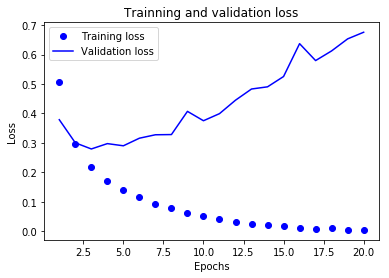

In [33]:
import matplotlib.pyplot as plt

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss) + 1)

plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Trainning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 코드 3-10 훈련과 검증 정확도 그리기

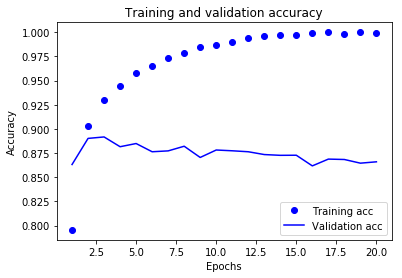

In [34]:
plt.clf()  
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

fig2 = plt.gcf()

plt.draw()
fig2.savefig('fig2.png', dpi=100)

## 코드 3-11 모델을 처음부터 다시 훈련하기

In [35]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 6s 234us/step - loss: 0.4448 - acc: 0.8257
Epoch 2/4
25000/25000 [==============================] - 5s 190us/step - loss: 0.2588 - acc: 0.9120
Epoch 3/4
25000/25000 [==============================] - 5s 193us/step - loss: 0.2020 - acc: 0.9295
Epoch 4/4
25000/25000 [==============================] - 7s 263us/step
